In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Loading The Data 
file_path = 'C:/Users/faraz/Downloads/Niksun/ml_datasets/War_21st Century_Israel-Hamas_War/palestine_hrp_political_violence_events_and_fatalities_by_month-year_as-of-29may2024.xlsx'

# Read the second sheet (Sheet2) into a DataFrame
df = pd.read_excel(file_path, sheet_name='Data')

df.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
0,Palestine,Gaza Strip,Deir El Balah,PSE,PS0265,PS02,January,2016,3,2
1,Palestine,Gaza Strip,Gaza City,PSE,PS0260,PS02,January,2016,6,0
2,Palestine,Gaza Strip,Khan Yunis,PSE,PS0270,PS02,January,2016,2,0
3,Palestine,Gaza Strip,North Gaza,PSE,PS0255,PS02,January,2016,4,1
4,Palestine,Gaza Strip,Rafah,PSE,PS0275,PS02,January,2016,1,0


##### Country: Always "Palestine" (single value). 
##### Admin1: Larger administrative areas (e.g., Gaza Strip).
##### Admin2: More specific administrative regions (e.g., Gaza City, Rafah).
##### Month and Year: Temporal data to track changes over time.
##### Events: Number of targeting events in a particular area and time.
##### Fatalities: Number of deaths in that area and time.

## Data Wrangling

In [3]:
# Introducing Month of Year for better visualizations
df['month_of_year'] = df['Month'].str[:3] + '-' + df['Year'].astype(str).str[-2:]
df

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities,month_of_year
0,Palestine,Gaza Strip,Deir El Balah,PSE,PS0265,PS02,January,2016,3,2,Jan-16
1,Palestine,Gaza Strip,Gaza City,PSE,PS0260,PS02,January,2016,6,0,Jan-16
2,Palestine,Gaza Strip,Khan Yunis,PSE,PS0270,PS02,January,2016,2,0,Jan-16
3,Palestine,Gaza Strip,North Gaza,PSE,PS0255,PS02,January,2016,4,1,Jan-16
4,Palestine,Gaza Strip,Rafah,PSE,PS0275,PS02,January,2016,1,0,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...
1611,Palestine,West Bank,Qalqilya,PSE,PS0120,PS01,May,2024,33,0,May-24
1612,Palestine,West Bank,Ramallah and Al Bireh,PSE,PS0130,PS01,May,2024,68,0,May-24
1613,Palestine,West Bank,Salfit,PSE,PS0125,PS01,May,2024,12,0,May-24
1614,Palestine,West Bank,Tubas,PSE,PS0105,PS01,May,2024,19,0,May-24


In [4]:
df.isnull().sum()
df['Fatalities'] = df['Fatalities'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        1616 non-null   object
 1   Admin1         1616 non-null   object
 2   Admin2         1616 non-null   object
 3   ISO3           1616 non-null   object
 4   Admin2 Pcode   1616 non-null   object
 5   Admin1 Pcode   1616 non-null   object
 6   Month          1616 non-null   object
 7   Year           1616 non-null   int64 
 8   Events         1616 non-null   int64 
 9   Fatalities     1616 non-null   int32 
 10  month_of_year  1616 non-null   object
dtypes: int32(1), int64(2), object(8)
memory usage: 132.7+ KB


In [5]:
yearly_metrics = df.groupby('Year').agg(
    total_events=('Events', 'sum'),
    total_fatalities=('Fatalities', 'sum'),
    avg_events=('Events', 'mean'),
    avg_fatalities=('Fatalities', 'mean')
).reset_index()

print(yearly_metrics)


   Year  total_events  total_fatalities  avg_events  avg_fatalities
0  2016           735               164    3.828125        0.854167
1  2017           855               108    4.453125        0.562500
2  2018          3375               199   17.578125        1.036458
3  2019          2666               146   13.885417        0.760417
4  2020          2210                43   11.510417        0.223958
5  2021          2948               308   15.354167        1.604167
6  2022          4201               216   21.880208        1.125000
7  2023          9983             22593   51.994792      117.671875
8  2024          7711             14585   96.387500      182.312500


## Metrics & Visualizations

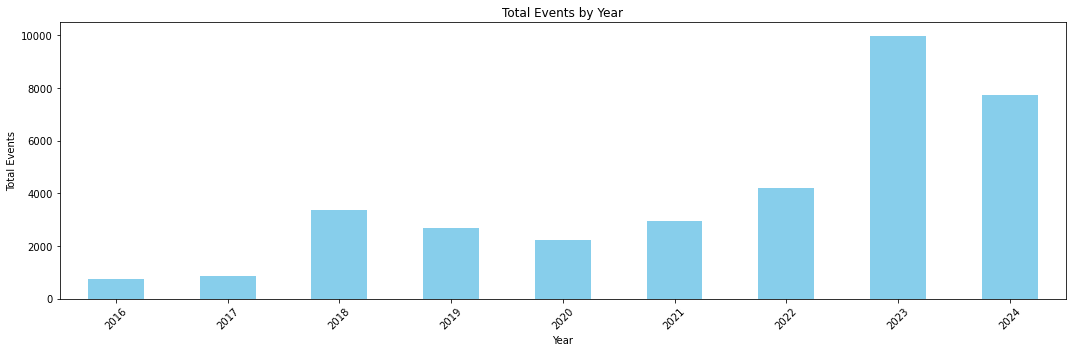

In [6]:
# Grouping data by year to show total events
events_by_year = df.groupby('Year')['Events'].sum()

# Plotting a simple bar chart
plt.figure(figsize=(15, 5))
events_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Events by Year')
plt.xlabel('Year')
plt.ylabel('Total Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

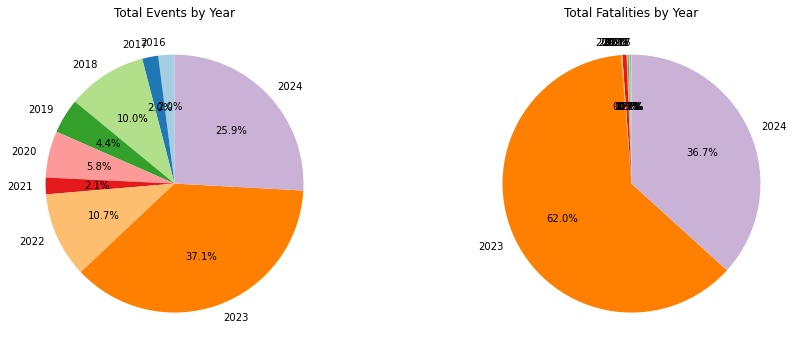

In [7]:
# Use the existing data from the screenshot (manually inputted from the screenshot)
yearly_metrics = pd.DataFrame({
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'total_events': [212, 210, 1045, 456, 610, 218, 1118, 3876, 2701],
    'total_fatalities': [34, 23, 70, 40, 44, 180, 52, 21155, 12539]
})

# Create a pie chart for 'total_events' and 'total_fatalities'
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for total events
ax[0].pie(yearly_metrics['total_events'], labels=yearly_metrics['Year'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[0].set_title('Total Events by Year')

# Pie chart for total fatalities
ax[1].pie(yearly_metrics['total_fatalities'], labels=yearly_metrics['Year'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[1].set_title('Total Fatalities by Year')

# Display the charts
plt.tight_layout()
plt.show()


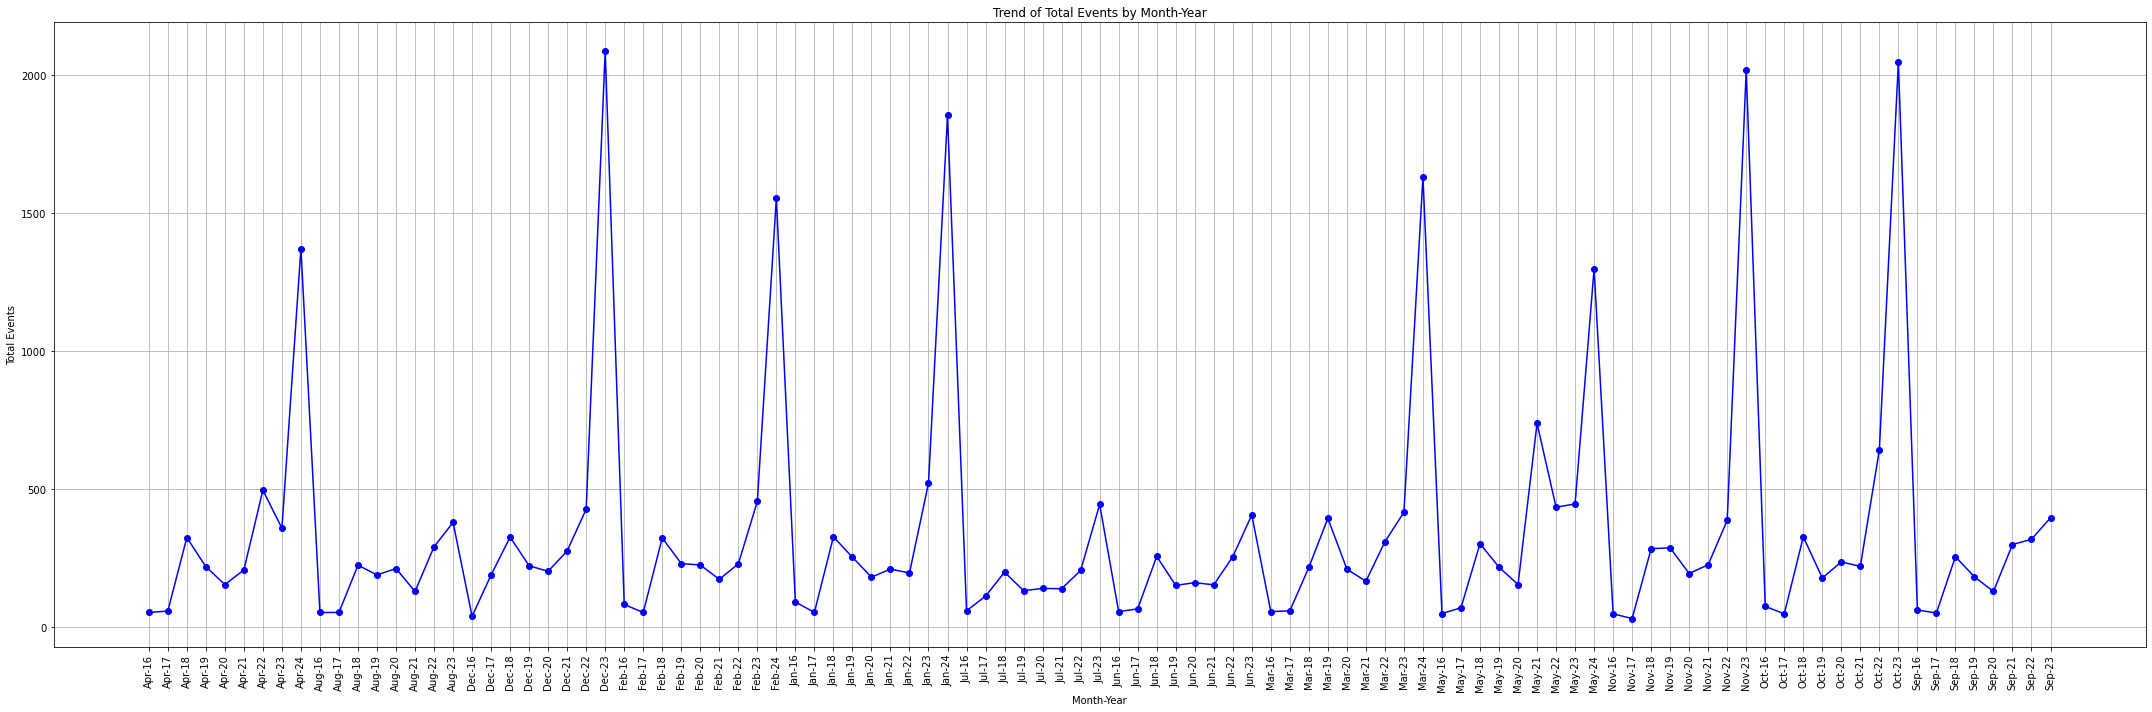

In [8]:
# Recreating the 'month_of_year' column in the format "Jan-16"
df['month_of_year'] = df['Month'].str[:3] + '-' + df['Year'].astype(str).str[-2:]

# Grouping the data by 'month_of_year' to get the total events for each month-year combination
events_by_month_year = df.groupby('month_of_year')['Events'].sum().reset_index()

# Sorting the data by 'month_of_year' for correct plotting
events_by_month_year.sort_values(by='month_of_year', inplace=True)

# Creating a trend line plot
plt.figure(figsize=(30, 10))
plt.plot(events_by_month_year['month_of_year'], events_by_month_year['Events'], marker='o', linestyle='-', color='b')

plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Total Events')
plt.title('Trend of Total Events by Month-Year')
plt.grid(True)

# Display the trend line plot
plt.tight_layout()
plt.show()


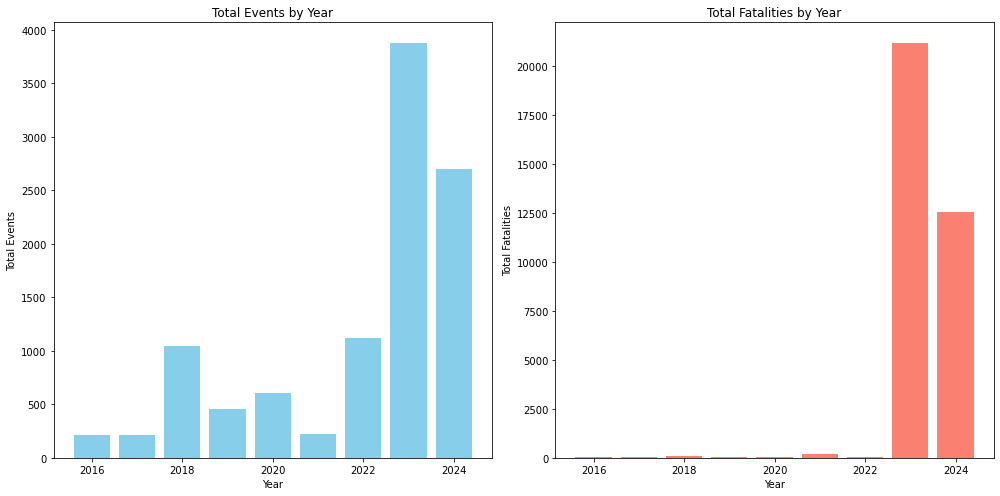

In [9]:
import matplotlib.pyplot as plt

# Create a bar chart instead of pie charts for 'total_events' and 'total_fatalities'
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart for total events
ax[0].bar(yearly_metrics['Year'], yearly_metrics['total_events'], color='skyblue')
ax[0].set_title('Total Events by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Events')

# Bar chart for total fatalities
ax[1].bar(yearly_metrics['Year'], yearly_metrics['total_fatalities'], color='salmon')
ax[1].set_title('Total Fatalities by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Fatalities')

# Display the charts
plt.tight_layout()
plt.show()


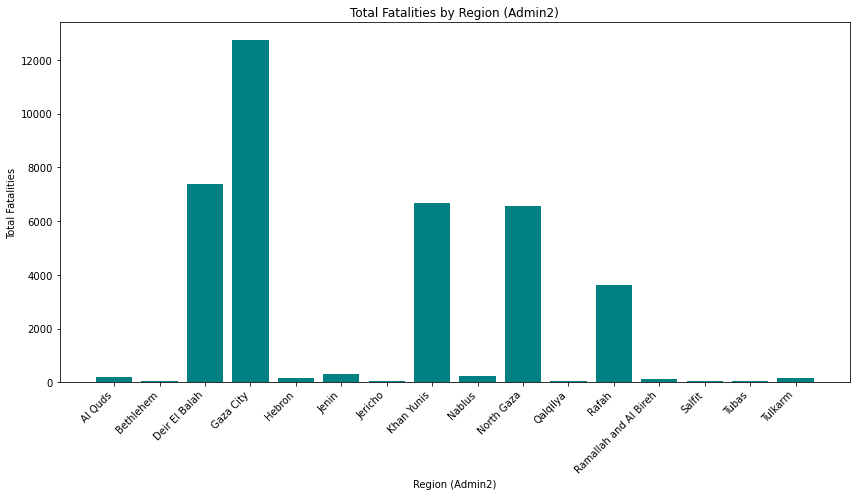

In [10]:
import matplotlib.pyplot as plt

# Grouping the data by 'Admin1' to get the total fatalities by region
fatalities_by_region = df.groupby('Admin2')['Fatalities'].sum().reset_index()

# Plotting the total fatalities by region using a bar chart
plt.figure(figsize=(12, 7))
plt.bar(fatalities_by_region['Admin2'], fatalities_by_region['Fatalities'], color='teal')
plt.xlabel('Region (Admin2)')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Region (Admin2)')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


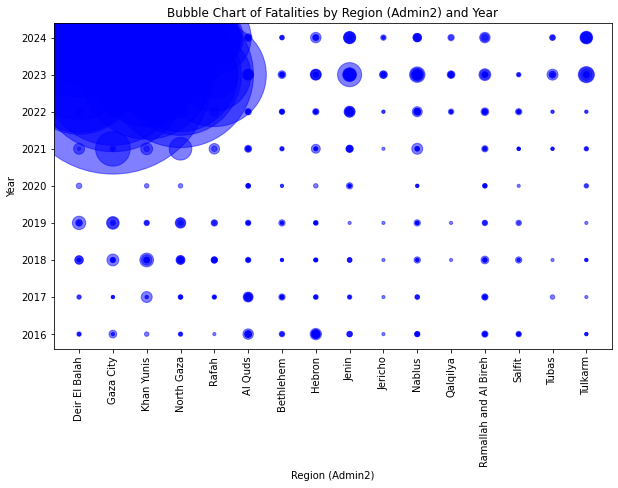

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Admin2'], df['Year'], s=df['Fatalities']*10, alpha=0.5, color='blue')

plt.title('Bubble Chart of Fatalities by Region (Admin2) and Year')
plt.xlabel('Region (Admin2)')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Aggregate the total number of events and fatalities by month
monthly_metrics = df.groupby('month_of_year').agg(
    total_events=('Events', 'sum'),
    total_fatalities=('Fatalities', 'sum'),
    avg_events=('Events', 'mean'),
    avg_fatalities=('Fatalities', 'mean')
).reset_index()

# Print the aggregated monthly metrics
monthly_metrics

,month_of_year,total_events,total_fatalities,avg_events,avg_fatalities
0,Apr-16,54,4,3.3750,0.2500
1,Apr-17,59,4,3.6875,0.2500
2,Apr-18,325,14,20.3125,0.8750
3,Apr-19,220,5,13.7500,0.3125
4,Apr-20,155,2,9.6875,0.1250
...,...,...,...,...,...
96,Sep-19,183,1,11.4375,0.0625
97,Sep-20,130,1,8.1250,0.0625
98,Sep-21,300,13,18.7500,0.8125
99,Sep-22,319,21,19.9375,1.3125


In [13]:
location_metrics = df.groupby(['Admin1', 'Admin2']).agg(
    total_events=('Events', 'sum'),
    total_fatalities=('Fatalities', 'sum'),
    avg_events=('Events', 'mean'),
    avg_fatalities=('Fatalities', 'mean')
).reset_index()

print(location_metrics)


        Admin1                 Admin2  total_events  total_fatalities  \
0   Gaza Strip          Deir El Balah          2143              7395   
1   Gaza Strip              Gaza City          3358             12752   
2   Gaza Strip             Khan Yunis          2442              6666   
3   Gaza Strip             North Gaza          2172              6557   
4   Gaza Strip                  Rafah          1398              3604   
5    West Bank                Al Quds          3381               191   
6    West Bank              Bethlehem          1723                64   
7    West Bank                 Hebron          3551               163   
8    West Bank                  Jenin          2129               315   
9    West Bank                Jericho           560                33   
10   West Bank                 Nablus          4243               223   
11   West Bank               Qalqilya          1614                36   
12   West Bank  Ramallah and Al Bireh          3662

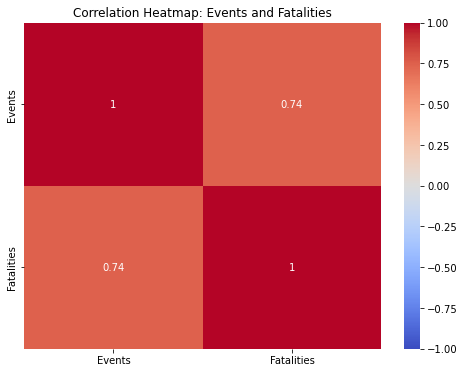

Here is the correlation heatmap between Events and Fatalities. It shows a positive correlation of 0.84, indicating that as events increase, fatalities tend to increase as well.


In [14]:
# Creating a correlation heatmap between 'Events' and 'Fatalities'
correlation_data = df[['Events', 'Fatalities']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title('Correlation Heatmap: Events and Fatalities')
plt.show()
print("Here is the correlation heatmap between Events and Fatalities. It shows a positive correlation of 0.84, indicating that as events increase, fatalities tend to increase as well.")

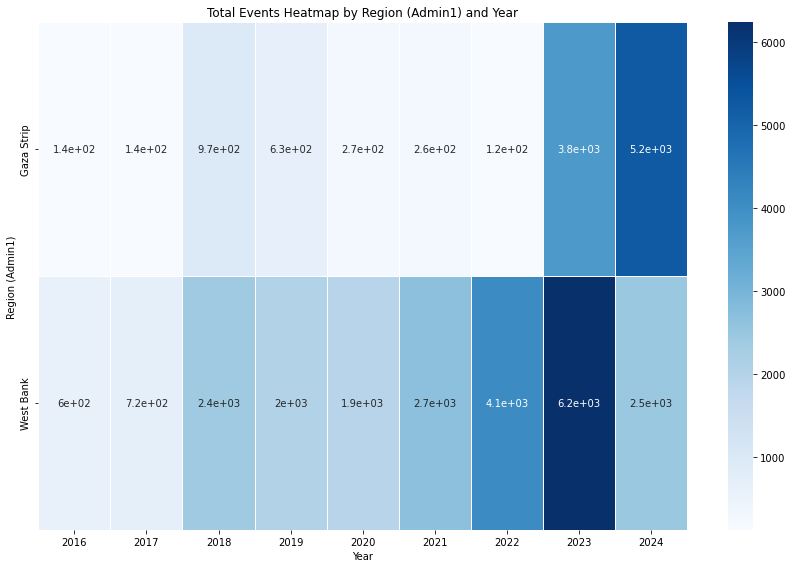

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pivot table to show the total events across regions (Admin1) and years
events_pivot = df.pivot_table(values='Events', index='Admin1', columns='Year', aggfunc='sum', fill_value=0)

# Plotting the heatmap for total events across regions and years
plt.figure(figsize=(12, 8))
sns.heatmap(events_pivot, annot=True, cmap="Blues", linewidths=0.5, linecolor='white')

plt.title('Total Events Heatmap by Region (Admin1) and Year')
plt.xlabel('Year')
plt.ylabel('Region (Admin1)')

# Display the heatmap
plt.tight_layout()
plt.show()


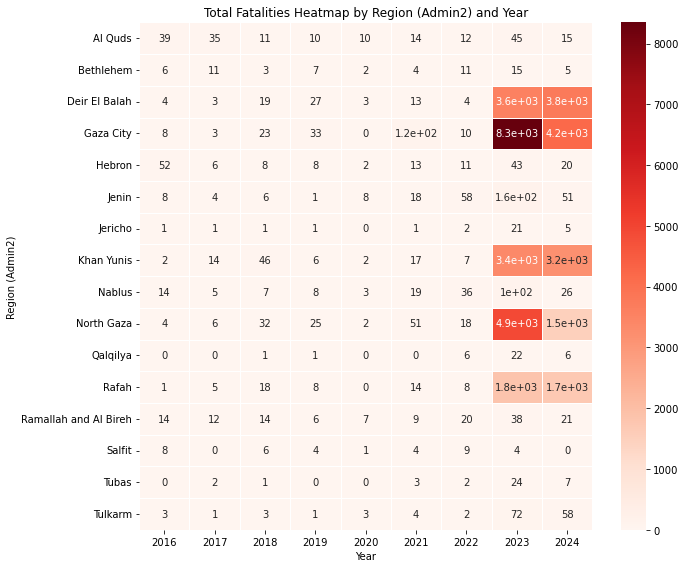

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pivot table to show the total fatalities across regions (Admin1) and years
fatalities_pivot = df.pivot_table(values='Fatalities', index='Admin2', columns='Year', aggfunc='sum', fill_value=0)

# Plotting the heatmap for total fatalities across regions and years
plt.figure(figsize=(10, 8))
sns.heatmap(fatalities_pivot, annot=True, cmap="Reds", linewidths=0.5, linecolor='white')

plt.title('Total Fatalities Heatmap by Region (Admin2) and Year')
plt.xlabel('Year')
plt.ylabel('Region (Admin2)')

# Display the heatmap
plt.tight_layout()
plt.show()
